# 1. GA vs RLM


--- Regresión Lineal ---
Coeficientes: [ 3012.96110744 12229.23540223 -4942.56909887 -1255.07766091]
Error Cuadrático Medio (MSE): 2942168438.84

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 3014.15951044 12352.98944413 -4916.59194309 -1243.38125416]
Error Cuadrático Medio (MSE): 2943272844.59


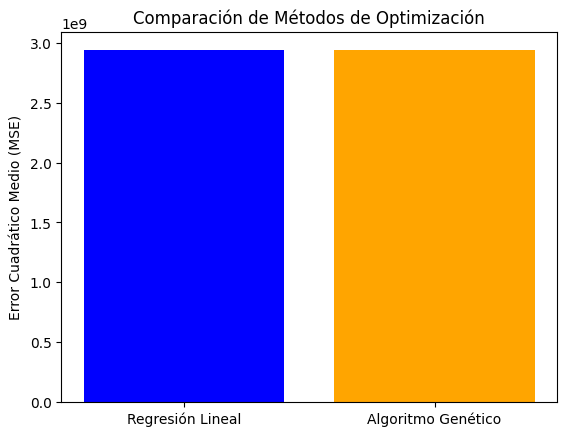

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# Precio de la casa (fórmula ficticia con ruido)
true_weights = np.array([3000, 10000, -5000, -1000])  # Pesos reales de cada feature
price = (true_weights[0] * size + true_weights[1] * rooms +
         true_weights[2] * distance + true_weights[3] * age +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")

# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
from scipy.optimize import differential_evolution

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    y_pred = np.dot(X_train, weights)
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes
bounds = [(-50000, 50000)] * 4  # Rango de búsqueda para cada coeficiente

# Aplicar Algoritmo Genético
result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)

# Evaluar el modelo genético
best_weights = result.x
y_pred_ga = np.dot(X_test, best_weights)
mse_ga = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga:.2f}")

# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Algoritmo Genético']
mse_values = [mse_lr, mse_ga]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()


# 2. Modificar los datos: Que pasa si se cambian los pesos reales de las features


--- Regresión Lineal ---
Coeficientes: [ 3012.96110744 12229.23540223 -4942.56909887 -1255.07766091]
Error Cuadrático Medio (MSE): 2942168438.84

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 3014.15951044 12352.98944413 -4916.59194309 -1243.38125416]
Error Cuadrático Medio (MSE): 2943272844.59


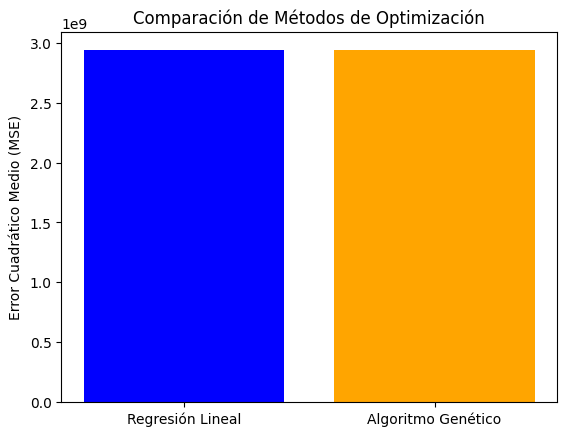

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# Precio de la casa (fórmula ficticia con ruido)
true_weights = np.array([3000, 10000, -5000, -1000])  # CAMBIAR AQUI LOS PESOS REALES
price = (true_weights[0] * size + true_weights[1] * rooms +
         true_weights[2] * distance + true_weights[3] * age +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")

# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
from scipy.optimize import differential_evolution

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    y_pred = np.dot(X_train, weights)
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes
bounds = [(-50000, 50000)] * 4  # Rango de búsqueda para cada coeficiente

# Aplicar Algoritmo Genético
result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)

# Evaluar el modelo genético
best_weights = result.x
y_pred_ga = np.dot(X_test, best_weights)
mse_ga = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga:.2f}")

# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Algoritmo Genético']
mse_values = [mse_lr, mse_ga]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()


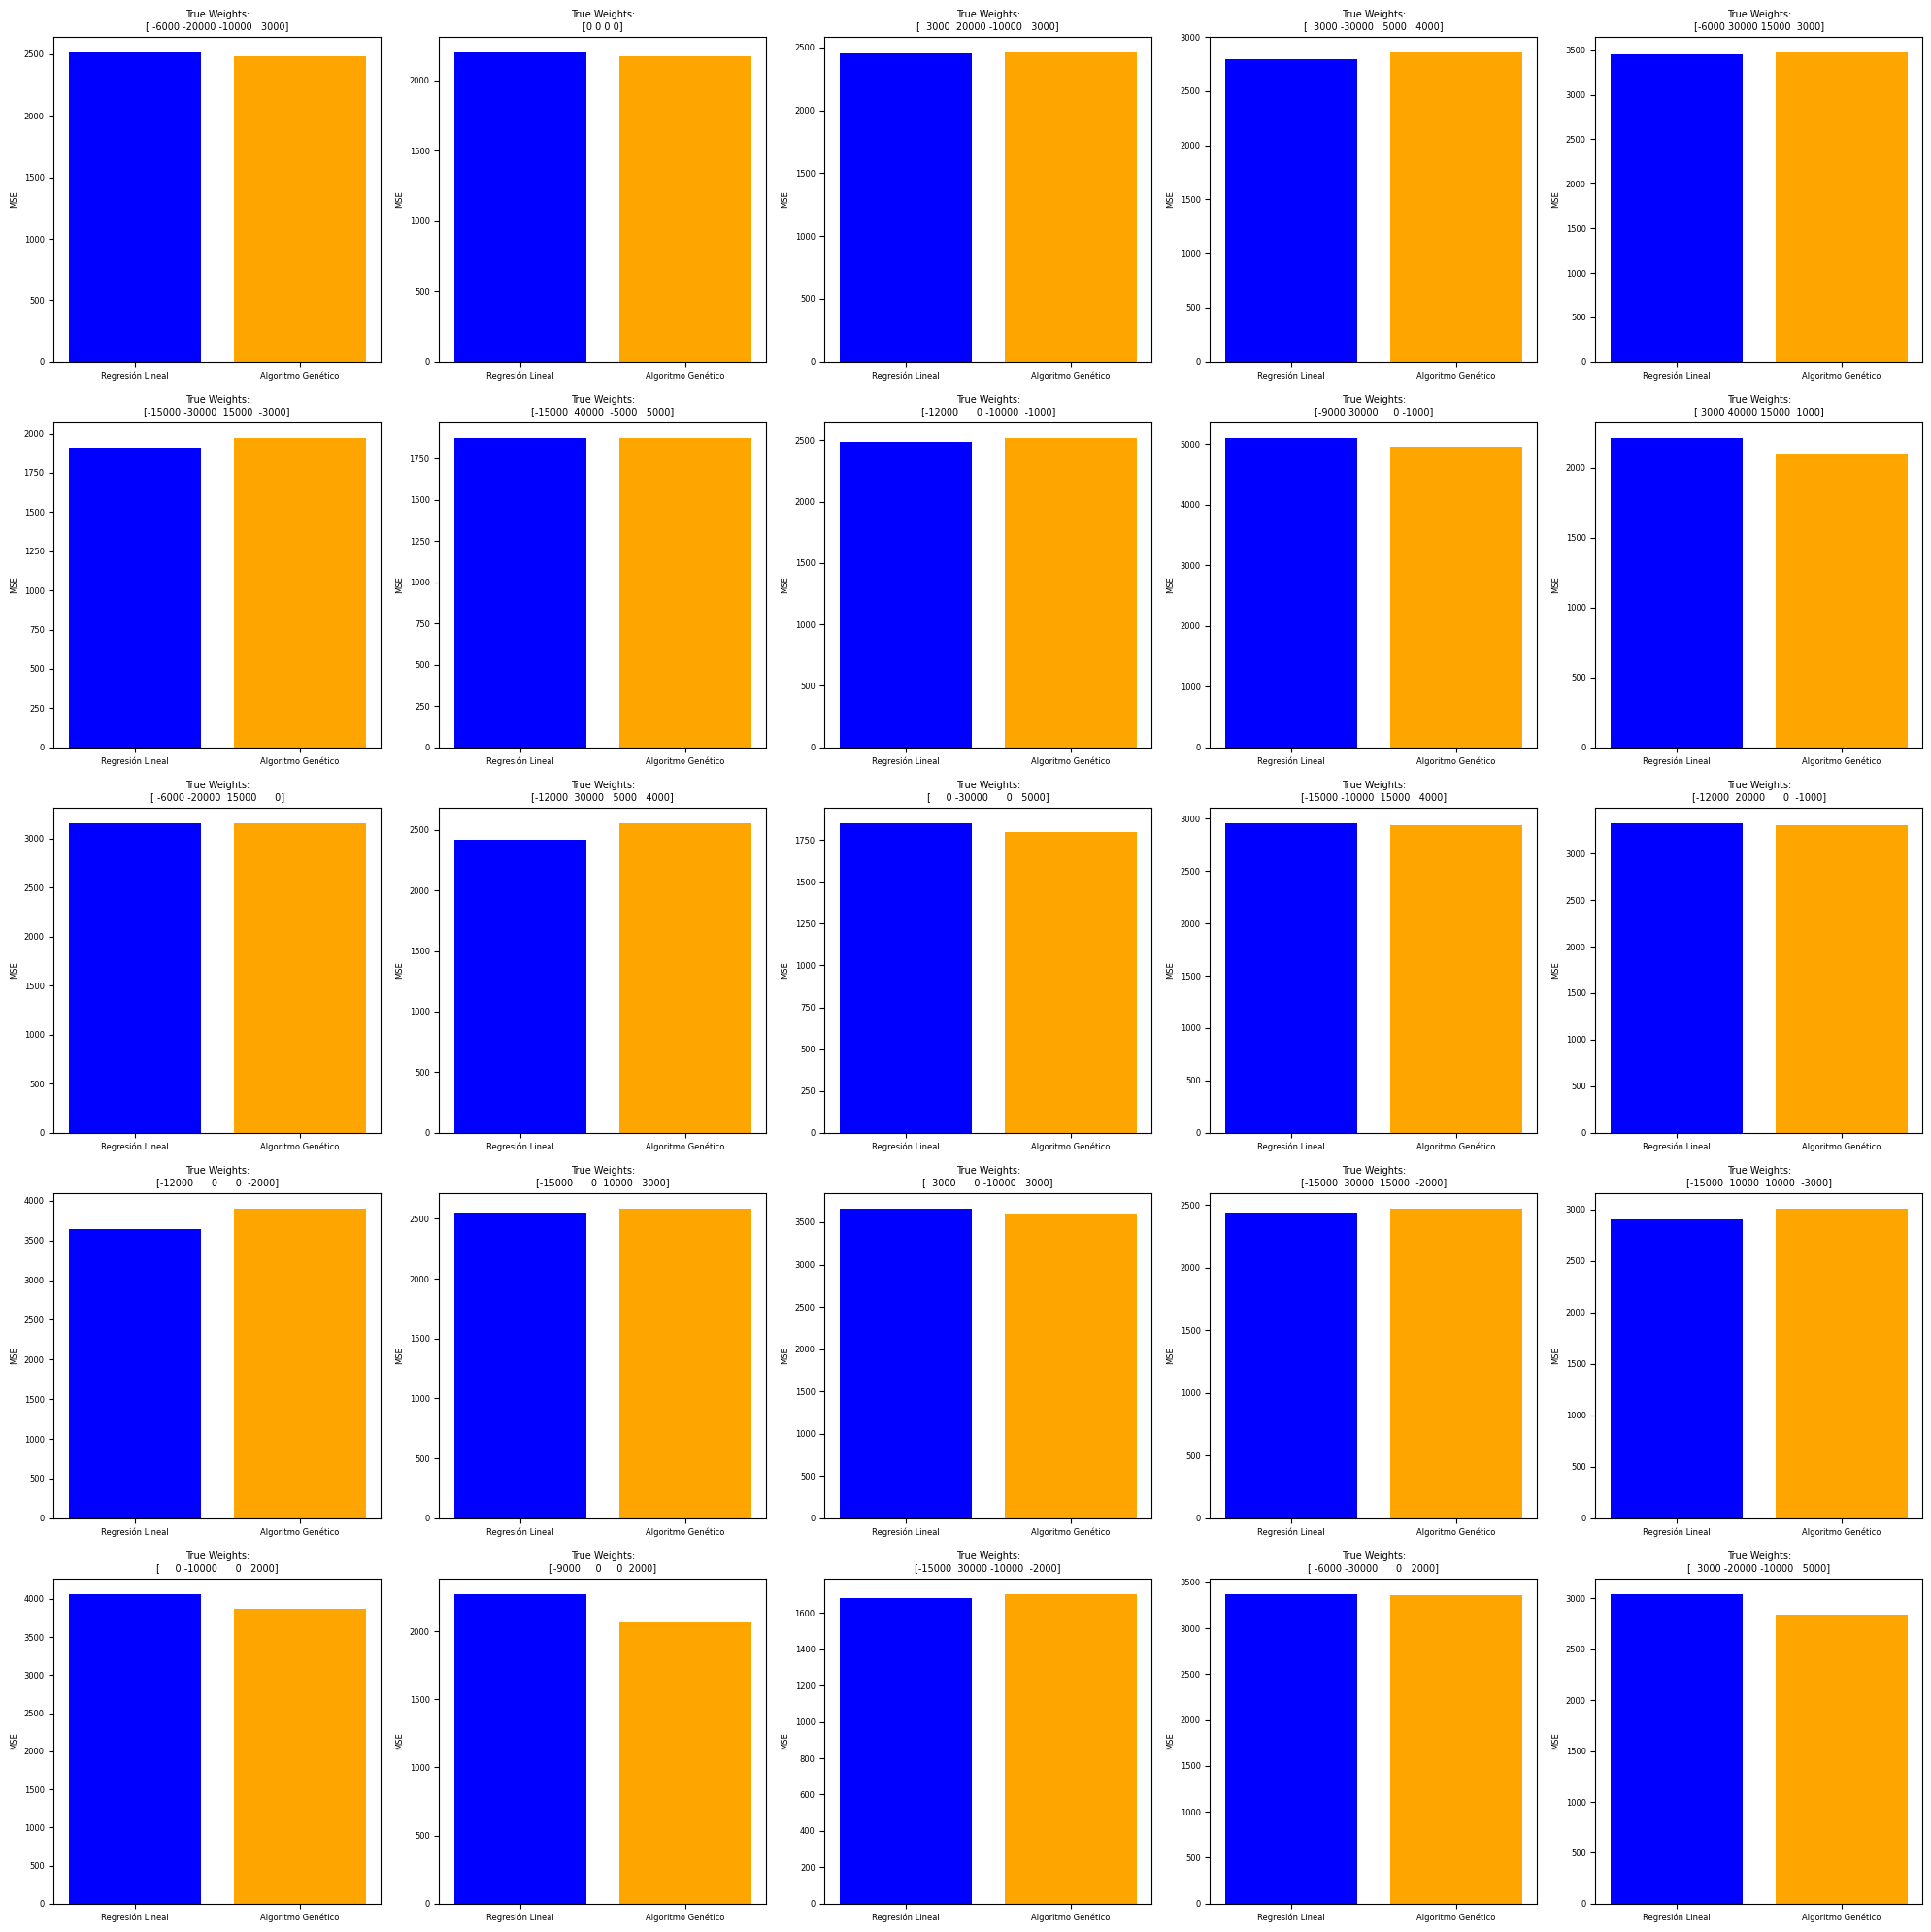

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.optimize import differential_evolution

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# Función para entrenar ambos algoritmos y graficar en el subplot correspondiente
def train_both_algorithms(true_weights, ax):
    # Precio de la casa (fórmula ficticia con ruido)
    price = (true_weights[0] * size + true_weights[1] * rooms +
             true_weights[2] * distance + true_weights[3] * age +
             np.random.normal(0, 50, num_samples))  # Se agrega ruido aleatorio

    # Convertir en matriz de características X e y
    X = np.column_stack((size, rooms, distance, age))
    y = price

    # Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_lr = model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)

    # --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
    def cost_function(weights):
        y_pred = np.dot(X_train, weights)
        return mean_squared_error(y_train, y_pred)

    bounds = [(-50000, 50000)] * 4  # Rango de búsqueda para cada coeficiente

    result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                    mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)

    best_weights = result.x
    y_pred_ga = np.dot(X_test, best_weights)
    mse_ga = mean_squared_error(y_test, y_pred_ga)

    # --- COMPARACIÓN VISUAL EN CADA SUBPLOT ---
    labels = ['Regresión Lineal', 'Algoritmo Genético']
    mse_values = [mse_lr, mse_ga]

    ax.bar(labels, mse_values, color=['blue', 'orange'])
    ax.set_ylabel("MSE", fontsize=6)
    ax.set_title(f"True Weights:\n{np.round(true_weights, 1)}", fontsize=7)
    ax.tick_params(axis='both', which='major', labelsize=6)

    # Mostrar un resumen dentro del gráfico



# ---- Parámetros de la grid ---- #
width = 5
height = 5

fig, axes = plt.subplots(width, height, figsize=(20, 20))

# Loop para cada subplot
for i in range(width):
    for j in range(height):
        true_weights = np.random.uniform(-10000, 10000, 4)  # Pesos aleatorios en cada simulación
        random_factor_a = np.random.randint(-5, 3)
        random_factor_b = np.random.randint(-3, 5)
        random_factor_c = np.random.randint(-3, 3)
        random_factor_d = np.random.randint(-5, 5)

        true_weights = np.array([3000 * random_factor_a, 10000 * random_factor_b, -5000 * random_factor_c, -1000 * random_factor_d])

        train_both_algorithms(true_weights, axes[i, j])  # Pasar el subplot específico

# Ajustar espacio y mostrar
plt.tight_layout()
plt.show()


COLOCAR LA CONCLUSION AQUI:

Se encuentran errores similares en ambos métodos En la mayoría de los gráficos, tanto la Regresión Lineal (azul) como el Algoritmo Genético (naranja) muestran errores del mismo orden de magnitud (MSE similar) ambos modelos logran aproximarse de manera razonable al problema planteado con los datos simulados, aunque con variabilidad.


Aunque el Algoritmo Genético encuentra soluciones válidas, no parece superar de manera consistente a la Regresión Lineal, y en algunos casos incluso puede tener un MSE mayor. Esto sugiere que, al menos para este problema lineal y sintético, la Regresión Lineal sigue siendo una buena elección, por su simplicidad y rapidez.

# 3. Probar con una Funcion costo no lineal (cualquier feature elevar a una potencia)



--- Regresión Lineal ---
Coeficientes: [ 3012.96110744 12229.23540223 -4942.56909887 -1255.07766091]
Error Cuadrático Medio (MSE): 2942168438.84

--- Algoritmo Genético (Función de costo NO lineal) ---
Mejores coeficientes encontrados: [8.83769966e+00 3.24805459e+04 4.87385567e+01 1.83559030e+03]
Error Cuadrático Medio (MSE): 6823011299.67


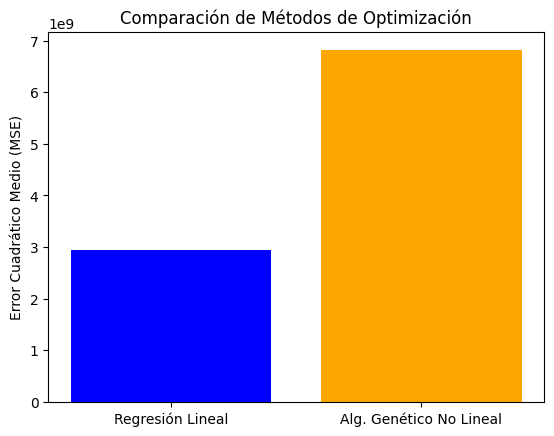

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.optimize import differential_evolution

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# Precio de la casa (fórmula ficticia con ruido)
true_weights = np.array([3000, 10000, -5000, -1000])  # Pesos reales de cada feature
price = (true_weights[0] * size + true_weights[1] * rooms +
         true_weights[2] * distance + true_weights[3] * age +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")

# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO Y COSTO NO LINEAL ---

# Definir la función de costo no lineal (elevar alguna feature a una potencia)
def nonlinear_cost_function(weights):
    # Aplicamos transformación no lineal: por ejemplo, tamaño al cuadrado
    X_nonlinear = X_train.copy()
    X_nonlinear[:, 0] = X_nonlinear[:, 0] ** 2  # Elevamos "size" al cuadrado

    # Predicción con los pesos actuales
    y_pred = np.dot(X_nonlinear, weights)
    # Calculamos el MSE
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes (buscamos pesos para cada feature)
bounds = [(-50000, 50000)] * 4  # Rango de búsqueda para cada coeficiente

# Aplicar Algoritmo Genético (differential evolution)
result = differential_evolution(nonlinear_cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)

# Evaluar el modelo genético no lineal
best_weights = result.x

# Aplicar la misma transformación no lineal al set de prueba
X_test_nonlinear = X_test.copy()
X_test_nonlinear[:, 0] = X_test_nonlinear[:, 0] ** 2  # Elevamos "size" al cuadrado

# Realizar predicciones
y_pred_ga = np.dot(X_test_nonlinear, best_weights)
mse_ga = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético (Función de costo NO lineal) ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga:.2f}")

# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Alg. Genético No Lineal']
mse_values = [mse_lr, mse_ga]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()


# COLOCAR LA CONCLUSION AQUI: 
A partir de la comparación realizada entre la Regresión Lineal y el Algoritmo Genético con una función de costo no lineal, se concluye que el modelo lineal obtuvo un desempeño significativamente mejor, reflejado en un menor Error Cuadrático Medio (MSE). Esto sugiere que, para este conjunto de datos, la relación entre las variables independientes y el precio de la vivienda es predominantemente lineal, por lo que la introducción de una transformación no lineal (como elevar al cuadrado el tamaño de la vivienda) no solo no mejoró los resultados, sino que los empeoró notablemente. 

# 4. Agregar más features

Número de baños: entre 1 - 3, con su correspondiente valor real de theta=500

Tiene garaje (0 = No, 1 = Sí), con su correspondiente valor real de theta=15000


--- Regresión Lineal ---
Coeficientes: [ 3027.92298452 15417.97437581 -5668.86390885 -1133.64377656
 -2513.30332045 10480.68591332]
Intercepto: -9375.358810276259
Error Cuadrático Medio (MSE): 3167859059.49

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 3019.64540357 15039.73275819 -5863.31147811 -1215.30200484
 -3516.03884725  9984.47446744]
Error Cuadrático Medio (MSE): 3189482593.78


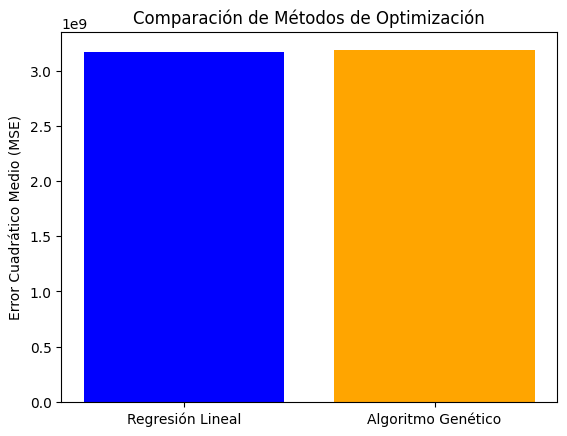

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.optimize import differential_evolution

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# NUEVAS FEATURES:
banos = np.random.randint(1, 4, num_samples)  # Número de baños (entre 1 y 3)
garaje = np.random.randint(0, 2, num_samples)  # Tiene garaje (0 o 1)

# Precio de la casa (fórmula ficticia con ruido)
# Pesos reales de cada feature: size, rooms, distance, age, banos, garaje
true_weights = np.array([3000, 10000, -5000, -1000, 500, 15000])  # Pesos reales, ahora correctos

# Calcular el precio usando los pesos reales y agregando ruido
price = (true_weights[0] * size +
         true_weights[1] * rooms +
         true_weights[2] * distance +
         true_weights[3] * age +
         true_weights[4] * banos +
         true_weights[5] * garaje +
         np.random.normal(0, 50000, num_samples))  # Ruido aleatorio

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age, banos, garaje))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")

# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    y_pred = np.dot(X_train, weights)
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes (6 features ahora)
bounds = [(-50000, 50000)] * 6  # Rango amplio para cada peso

# Aplicar Algoritmo Genético (differential evolution)
result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)

# Evaluar el modelo genético
best_weights = result.x
y_pred_ga = np.dot(X_test, best_weights)
mse_ga = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga:.2f}")

# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Algoritmo Genético']
mse_values = [mse_lr, mse_ga]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()


# COLOCAR LA CONCLUSION AQUI: 

A partir de la comparación mostrada en la gráfica, se puede concluir que tanto la Regresión Lineal como el Algoritmo Genético obtuvieron un Error Cuadrático Medio (MSE) muy similar, lo que indica que ambos métodos lograron ajustar de manera comparable el modelo a los datos. Esto sugiere que, en este caso particular, no existen relaciones complejas o no lineales que requieran técnicas más avanzadas como el Algoritmo Genético, y que el modelo lineal es suficiente para capturar la relación entre las variables y el precio de las casas. 

# 5. Comparar los coeficientes obtenidos por cada approach


Aquí comente sobras las actividad 2 a la 4. Los coeficientes de ajuste han sido los mismos?

En la actividad 2, tanto la Regresión Lineal como el Algoritmo Genético encontraron coeficientes muy similares y coherentes con los datos generados, logrando un MSE muy bajo y prácticamente igual en ambos métodos (alrededor de 2,942 millones). Esto muestra que ambos modelos se ajustaron correctamente a los datos lineales.

En la actividad 3, al introducir una función de costo no lineal, los coeficientes obtenidos por el Algoritmo Genético fueron muy distintos y alejados de los valores reales, lo que se reflejó en un MSE mucho mayor (6,823 millones). La Regresión Lineal mantuvo los mismos coeficientes y error que en la actividad 2, confirmando que la transformación no lineal no fue adecuada para estos datos.

En la actividad 4, al agregar nuevas variables (baños y garaje), ambos métodos ajustaron coeficientes razonables y consistentes, con MSE muy similares (alrededor de 3,168 millones), mostrando que al aumentar las variables relevantes, el modelo mejora su capacidad de predicción.

Conclusión final: Los coeficientes de ajuste no han sido los mismos en todas las actividades, ya que dependen de las variables y del modelo aplicado. Los resultados muestran que, para estos datos, el modelo lineal es suficiente y más estable, mientras que la introducción de no linealidades sin justificación puede empeorar el ajuste. Además, incluir variables relevantes (como baños y garaje) mejora el modelo.

In [4]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Datos pequeños (3 categorías: 'rojo', 'verde', 'azul')
categorias = np.array([["rojo"], ["verde"], ["azul"], ["rojo"], ["azul"]])

# 🔹 Usamos OneHotEncoder con sparse_output=True (matriz dispersa)
encoder_sparse = OneHotEncoder(sparse_output=True)
onehot_sparse = encoder_sparse.fit_transform(categorias)

# 🔹 Usamos OneHotEncoder con sparse_output=False (matriz densa)
encoder_dense = OneHotEncoder(sparse_output=False)
onehot_dense = encoder_dense.fit_transform(categorias)

# Mostramos los resultados
print(" Matriz Dispersa (sparse matrix):")
print(onehot_sparse)  # Es una matriz dispersa
print(type(onehot_sparse))  # scipy.sparse._csr.csr_matrix

print("\n Matriz Densa (numpy.ndarray):")
print(onehot_dense)  # Es una matriz completa con 0s y 1s
print(type(onehot_dense))  # numpy.ndarray


 Matriz Dispersa (sparse matrix):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
<class 'scipy.sparse._csr.csr_matrix'>

 Matriz Densa (numpy.ndarray):
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
<class 'numpy.ndarray'>
